In [1]:
import pandas as pd
import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

In [157]:
import os
d = dict()
size = 0
with open('ascii/words.txt','r') as f:
    for line in f.readlines():
        if line[0] != '#' and line.split()[1] == "ok":
            size += 1
            if size > 5000:
                break
            l = line.split()
            d[l[0]] = l[-1]

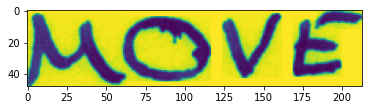

In [158]:
image = img.imread("./words/a01/a01-000u/a01-000u-00-01.png")
plt.imshow(image)

<ipython-input-166-88590a0a57b7>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images = np.array(images)


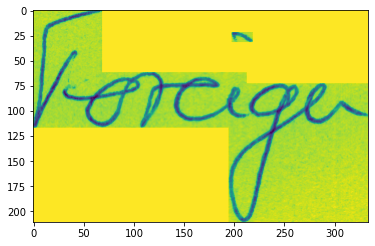

In [166]:
# Getting dataset
images = []
shapes = [[], []]
for name in d.keys():
    path = "./words/"
    directories = name.split('-')
    path += directories[0] + "/"
    path += directories[0] + "-" + directories[1] + "/"
    path += name + ".png"
    try:
        image = img.imread(path)
        images.append([image, d[name]])
        shapes[0].append(image.shape[0])
        shapes[1].append(image.shape[1])
        # Looking for particular image
        if image.shape[0] == 211:
            plt.imshow(image)
        #if image.shape[1] == 820:
            #plt.imshow(image)
    except:
        SyntaxError
images = np.array(images)

nuclear


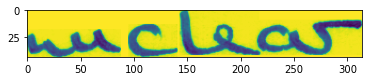

In [161]:
# Checking random words
import random
t = random.randint(0, len(images))
plt.imshow(images[t][0])
print(images[t][1])

In [169]:
# max height, max width
max_height, max_width = max(shapes[0]), max(shapes[1])
max_height, max_width

(211, 820)

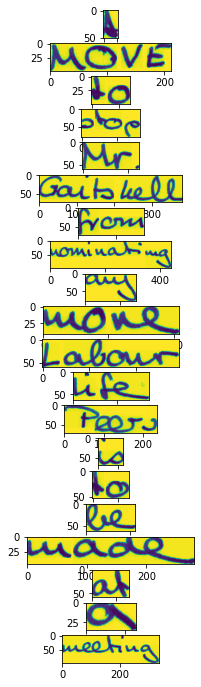

In [51]:
fig, axs = plt.subplots(20, figsize = (180, 12))
for i in range(20):
    axs[i].imshow(images[i][0])

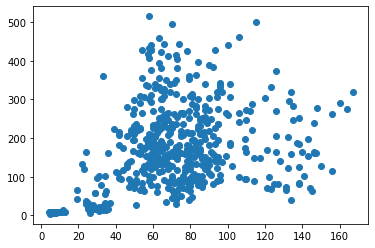

In [153]:
# Width = f(Height)
plt.scatter(shapes[0], shapes[1])

(array([ 20.,  34.,  42., 137., 133.,  69.,  19.,  21.,  20.,   5.]),
 array([  4. ,  20.3,  36.6,  52.9,  69.2,  85.5, 101.8, 118.1, 134.4,
        150.7, 167. ]),
 <BarContainer object of 10 artists>)

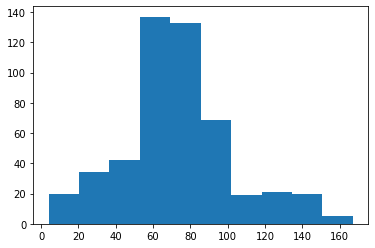

In [154]:
# heights
plt.hist(shapes[0])

(array([53., 87., 86., 95., 67., 51., 31., 11., 16.,  3.]),
 array([  4. ,  55.1, 106.2, 157.3, 208.4, 259.5, 310.6, 361.7, 412.8,
        463.9, 515. ]),
 <BarContainer object of 10 artists>)

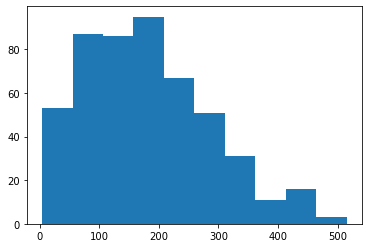

In [155]:
# widths
plt.hist(shapes[1])

In [167]:
# Adding blank space to adapt shape
def reshape_image(im, new_height, new_width, value=1):
    x,y = im.shape  
    (pad_y_top, pad_y_down) = ((new_height-x)//2, (new_height-x)//2) if ((new_height-x) % 2 == 0) else ((new_height-x)//2 + 1, (new_height-x)//2)
    (pad_x_right, pad_x_left) = ((new_width-y)//2, (new_width-y)//2) if ((new_width-y) % 2 == 0) else ((new_width-y)//2 + 1, (new_width-y)//2)
    return np.pad(im, ((pad_y_top, pad_y_down), (pad_x_left, pad_x_right)), 'constant', constant_values=value)

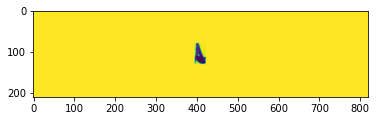

In [175]:
adapted = reshape_image(images[0][0], max_height, max_width)
plt.imshow(adapted)